In [1]:
import numpy as np
from castle.datasets import IIDSimulation, DAG
from castle.metrics import MetricsDAG
from diffan.diffan import DiffAN
from diffan.utils import num_errors
from cdt.metrics import SID
# from metrics import SID
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
np.set_printoptions(precision=3)

Detecting 8 CUDA device(s).


# Dataset setting


In [2]:
import pandas 
n_nodes = 5 # 2 3 5 10
num_samples = 1000 # 1000, 10000 
#graph 10, 20, 100 반복측정 topological order의 numerical error diff-FNO comparison 
#topological order error /10 mean, std ->report 
# 좋아질 경우 -> 왜? score model gradient neural gradient variance stable 확인이 필요. 
# 안좋아질 경우 -> gradient tensor 체크 필요 variance 0 ? 알 수 있음. 
#node 2 causal effect -> score의 gradient variance 0 chheck FNO, DiffAN 둘다 측정 데이터필요 
print(f"Creating dataset")
weighted_random_dag = DAG.erdos_renyi(n_nodes=n_nodes, n_edges=4*n_nodes, seed=3)
dataset = IIDSimulation(W=weighted_random_dag, n=num_samples, method='nonlinear', sem_type='gp')
true_causal_matrix, X = dataset.B, dataset.X


Creating dataset


2024-07-16 00:32:44,624 - /home/tomo6/anaconda3/lib/python3.11/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


# Visaulization


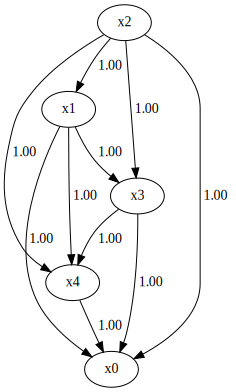

In [3]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

make_dot(true_causal_matrix)

# DiffAN

In [4]:

import numpy as np
from castle.datasets import IIDSimulation, DAG
from castle.metrics import MetricsDAG
from diffan.diffan import DiffAN
from diffan.utils import num_errors
from cdt.metrics import SID


#n_nodes = 2 # 2 3 5 10
#graph 10, 20, 100 반복측정 topological order의 numerical error diff-FNO comparison 
#topological order error /10 mean, std ->report 
# 좋아질 경우 -> 왜? score model gradient neural gradient variance stable 확인이 필요. 
# 안좋아질 경우 -> gradient tensor 체크 필요 variance 0 ? 알 수 있음. 
#node 2 causal effect -> score의 gradient variance 0 chheck FNO, DiffAN 둘다 측정 데이터필요 

def test_two_model(n_nodes,num_graphs,num_samples=1000):
    for _ in range(num_graphs):
        print(f"Creating {_}th dataset")
        weighted_random_dag = DAG.erdos_renyi(n_nodes=n_nodes, n_edges=4*n_nodes, seed=3)
        dataset = IIDSimulation(W=weighted_random_dag, n=num_samples, method='nonlinear', sem_type='gp')
        true_causal_matrix, X = dataset.B, dataset.X
        diffan = DiffAN(n_nodes, residue= True)
        adj_matrix, order = diffan.fit(X)
        print(f"DiffANM Num errors1 {num_errors(order, true_causal_matrix)}")

        mt = MetricsDAG(adj_matrix, true_causal_matrix).metrics
        mt["sid"] = SID(true_causal_matrix, adj_matrix).item()
        print(mt)


        

In [5]:
diffan = DiffAN(n_nodes, residue= True)
adj_matrix, order = diffan.fit(X)
print(f"DiffANM Num errors1 {num_errors(order, true_causal_matrix)}")

mt = MetricsDAG(adj_matrix, true_causal_matrix).metrics
mt["sid"] = SID(true_causal_matrix, adj_matrix).item()
print(mt)


Training Epoch:  62%|██████▏   | 621/1000 [00:04<00:02, 148.56it/s, Epoch Loss=4]   


Early stoping at epoch 621
Best model at epoch 320 with loss 3.2064056396484375


Nodes ordered :   0%|          | 0/4 [00:00<?, ?it/s]We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacrev is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.jacrev instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
Nodes ordered :  25%|██▌       | 1/4 [00:00<00:00,  8.40it/s]We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacfwd is deprecated as of PyTorch 2.0 and will be deleted in a future ver

jacobian [[[ 1.559e-01 -4.323e-02 -1.166e-02  8.225e-02 -4.524e-02]
  [-1.043e-01  4.632e-02  5.757e-03 -5.229e-02  2.416e-02]
  [ 7.976e-02 -2.053e-02  4.636e-03  4.402e-02 -3.211e-02]
  [ 6.218e-02 -8.136e-03 -1.422e-02  5.095e-02 -2.492e-02]
  [-7.126e-02  1.608e-02  2.726e-03 -4.632e-02  2.871e-02]]

 [[ 2.101e-02 -6.172e-03  2.004e-03 -3.617e-03 -3.614e-03]
  [-7.805e-03  1.784e-02  8.760e-04  7.294e-03 -1.861e-03]
  [-4.167e-03 -3.748e-03  9.291e-03 -3.897e-03 -4.948e-03]
  [ 3.412e-03  7.216e-03 -2.735e-03  1.157e-02 -6.347e-03]
  [-5.931e-03 -1.714e-03 -6.457e-04 -8.231e-03  8.083e-03]]

 [[ 9.703e-02 -1.929e-02  3.069e-01 -1.991e-01  2.644e-02]
  [-2.622e-01  4.280e-01  2.012e-01  1.017e-01  5.515e-01]
  [ 4.671e-01 -2.047e-01  5.854e-01 -4.830e-01 -1.747e-01]
  [-1.900e-01  8.265e-03 -1.124e-01  1.510e-01  1.609e-01]
  [-2.506e-01  5.032e-01  3.090e-01  1.083e-01  7.417e-01]]]
leaf variance [0.144 0.049 0.032 0.036 0.066]
jacobian [[[ 5.674e-01 -1.387e-01  1.048e-01  1.091e-0

Nodes ordered :  50%|█████     | 2/4 [00:01<00:01,  1.71it/s]

jacobian [[[ 0.718 -0.041  0.326 -0.255]
  [-0.187  0.415 -0.046 -0.091]
  [ 0.316  0.047  0.665 -0.287]
  [-0.289  0.058 -0.271  0.263]]

 [[ 0.626  0.057  0.145 -0.287]
  [-0.036  0.685  0.162  0.029]
  [ 0.041  0.276  0.444 -0.154]
  [-0.234  0.07  -0.196  0.274]]

 [[ 0.417  0.005 -0.049 -0.101]
  [ 0.024  0.46  -0.002  0.235]
  [ 0.046  0.034  0.169  0.144]
  [-0.181  0.147  0.193  0.68 ]]]
leaf variance [0.045 0.027 0.02  0.029]
jacobian [[[ 5.114e-02 -2.507e-03 -2.364e-02]
  [ 3.143e-02  2.193e-01 -1.453e-01]
  [ 6.983e-02 -1.493e-01  4.987e-02]]

 [[-8.681e-03  2.289e-02 -1.970e-02]
  [ 5.771e-03  1.378e-01 -1.095e-01]
  [-2.039e-03 -1.463e-01  1.257e-01]]

 [[ 2.357e+00 -3.518e-01 -7.468e-01]
  [-5.557e-01  2.534e-02  4.364e-02]
  [-7.320e-01  2.362e-01  5.288e-01]]]
leaf variance [5.764e+08 8.452e+07 4.584e+09]


Nodes ordered :  75%|███████▌  | 3/4 [00:01<00:00,  1.46it/s]

jacobian [[[ 0.452 -0.173 -0.025]
  [-0.056  0.642 -0.41 ]
  [ 0.102 -0.447  0.397]]

 [[ 0.794  0.343 -0.216]
  [ 0.34   0.615 -0.335]
  [-0.217 -0.283  0.251]]

 [[ 0.46  -0.009  0.203]
  [ 0.011  0.174  0.203]
  [ 0.129  0.205  0.84 ]]]
leaf variance [0.025 0.025 0.038]
jacobian [[[-0.128  0.05 ]
  [-0.161  0.064]]

 [[-0.503 -0.108]
  [ 0.113  0.031]]

 [[-0.128 -0.015]
  [-0.643 -0.137]]]
leaf variance [ 866.22  1268.773]


Nodes ordered : 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

jacobian [[[ 0.6   -0.132]
  [-0.006  0.347]]

 [[ 0.632  0.117]
  [ 0.108  0.309]]

 [[ 0.44   0.074]
  [ 0.176  1.035]]]
leaf variance [0.026 0.037]



Loading required package: nlme
This is mgcv 1.8-39. For overview type 'help("mgcv-package")'.


DiffANM Num errors1 4


DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.


{'fdr': 0.375, 'tpr': 0.5, 'fpr': 3.0, 'shd': 5, 'nnz': 8, 'precision': 0.625, 'recall': 0.5, 'F1': 0.5556, 'gscore': 0.2, 'sid': 15.0}


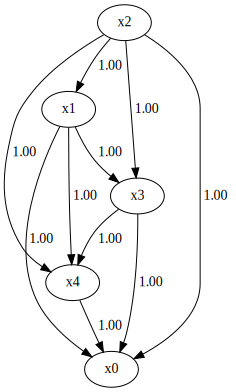

In [6]:
make_dot(true_causal_matrix)

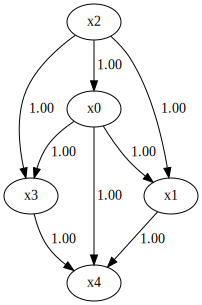

In [7]:
make_dot(adj_matrix)

# FNO



# Diffusion Setting

In [8]:
import math 
import torch
from torch import nn, einsum
import torch.nn.functional as F

class VPSDE:
    def __init__(self):
        self.beta_0 = 0.1
        self.beta_1 = 5
        self.T = 1.
    
    def beta(self, t):
        beta = (self.beta_1 - self.beta_0) * t + self.beta_0

        return beta 

    def marginal_log_mean_coeff(self, t):
        log_alpha_t = - 1 / (4) * (t ** 2) * (self.beta_1 - self.beta_0) - 1 /2 * t * self.beta_0
        return log_alpha_t

    def diffusion_coeff(self, t):

        return torch.exp(self.marginal_log_mean_coeff(t))

    def marginal_std(self, t):
        return torch.pow(1. - torch.exp(self.marginal_log_mean_coeff(t)*2), 1 / 2)

    def inverse_a(self, a):
        return 2/np.pi*(1+self.cosine_s)*torch.acos(a)-self.cosine_s

    def forward(self,x,t):
        x_t_mean = self.diffusion_coeff(t)[:,None] * x #times*grid
        x_t_std = self.marginal_std(t)#times
        noise = torch.randn_like(x).to(x.device)
        x_t = x_t_mean + x_t_std[:,None] * noise 
        x_t.noise = noise 
        return x_t
        

In [9]:
import torch
def score_loss(model, sde,x0,t,device):
    x_t = sde.forward(x0,t)
    x_t = x_t
    score = x_t.noise
    x_t = x_t.to(device)
    t= t.to(device)

    output = model(x_t,t.float())

    weight = output - score
    loss =  (weight).square().sum(dim=(1)).mean(dim=0)
    return loss

In [10]:


from logging import raiseExceptions
import torch
import numpy as np
from functorch import vmap, jacrev, jacfwd
from collections import Counter
from copy import deepcopy
from tqdm import tqdm

from diffan.nn import DiffMLP
from diffan.fno_1d import FNO
from diffan.pruning import cam_pruning
from diffan.utils import full_DAG

import numpy as np
from pygam import LinearGAM
from pygam.terms import TermList, SplineTerm



# def train_gam(X, y, numBasisFcts=10):

#     p = X.shape
#     if p[0]/p[1] < 3*numBasisFcts:
#         numBasisFcts = int(np.ceil(p[0]/(3*p[1])))
#         print(f"Changed number of basis functions to {numBasisFcts} in order to have enough samples per basis function")
#     terms = TermList()
#     for i in range(p[1]):
#         terms += SplineTerm(i, n_splines=numBasisFcts)
#     try:
#         mod_gam = LinearGAM(terms).gridsearch(X,y)
#     except:
#         print("There was some error with gam. The smoothing parameter is set to zero.")
#         terms = TermList()
#         for i in range(p[1]):
#             terms += SplineTerm(i, n_splines=numBasisFcts, lam=0)
#         mod_gam = LinearGAM(terms).fit(X,y)

#     result = {
#         'Yfit': mod_gam.predict(X),
#         'residuals': (mod_gam.predict(X)-y.squeeze()),
#         'model': mod_gam,
#         'deviance': mod_gam.statistics_['deviance'],
#         'edf': mod_gam.statistics_['edof'],
#         'edf_per_coef': mod_gam.statistics_['edof_per_coef'],
#         'p_values': mod_gam.statistics_['p_values'],
#     }

#     return result


# def selGam(X, y, k, cutOffPVal=0.001, numBasisFcts=10, output=False):
#     p = X.shape
#     if p[1] > 0: 
#         mod_gam = train_gam(X, y, numBasisFcts=numBasisFcts)
#         pValVec = np.array(mod_gam['p_values'])

#         if output:
#             print(f"vector of p-values:{pValVec}")
#         if len(pValVec) - 1 != p[1]: 
#             print("This should never happen (function selGam).")
#         selVec = pValVec[:k] < cutOffPVal
#     else:
#         selVec = np.array([])
#     return selVec


# def pruning(X, G, output=False, pruneMethod=selGam, cutOffPVal=0.001, numBasisFcts=10):
#     p = G.shape[0] 
#     finalG = np.zeros((p, p))

#     for i in range(p):
#         parents = np.where(G[:, i] == 1)[0] 
#         lenpa = len(parents)
#         if output:
#             print(f"Pruning variable: {i}")
#             print(f"Considered parents: {parents}")
#         if lenpa > 0:
#             selectedPar = pruneMethod(X[:, parents], X[:, i].reshape(-1,1), k=lenpa, cutOffPVal=cutOffPVal, numBasisFcts=numBasisFcts, output=output)
#             finalParents = parents[selectedPar] 
#             finalG[finalParents, i] = 1
#     return finalG


# def cam_pruning(A, X, cutoff):
#     dag = pruning(X, A, output=False, pruneMethod=selGam, cutOffPVal=cutoff, numBasisFcts=10)
#     return dag

# #ㅇ



class DiffAN_FNO():
    def __init__(self, n_nodes, masking = True, residue= True, 
                epochs: int = int(1000), batch_size : int = 1024, learning_rate : float = 0.001):
        self.n_nodes = n_nodes
        assert self.n_nodes > 1, "Not enough nodes, make sure the dataset contain at least 2 variables (columns)."
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        # self.device ='cpu'
        
        #diffusion setting 
        self.sde = VPSDE()
        self.n_steps = int(1e2)
        
        
        ## Diffusion training
        self.epochs = epochs 
        self.batch_size = batch_size
        # self.model = DiffMLP(n_nodes).to(self.device)
        self.model = FNO(n_nodes).to(self.device)
        self.model.float()
        
        self.opt = torch.optim.Adam(self.model.parameters(), learning_rate)
        self.val_diffusion_loss = []
        self.best_loss = float("inf")
        self.early_stopping_wait = 300

        ## Topological Ordering
        self.n_votes = 10
        self.masking = masking
        self.residue = residue
        self.sorting = (not masking) and (not residue)
        ## Pruning
        self.cutoff = 0.001
    
    def fit(self, X):
        
        X = (X - X.mean(0, keepdims = True)) / X.std(0, keepdims = True)
        X = torch.FloatTensor(X).to(self.device)
        self.train_score(X)
        
        order = self.topological_ordering2(X)
        out_dag = self.pruning(order, X.detach().cpu().numpy())
        return out_dag, order

    def pruning(self, order, X):
        return cam_pruning(full_DAG(order), X, self.cutoff)
    
    def train_score(self, X, fixed = None):
        if fixed is not None:
            self.epochs = fixed
        eps = 0
        
        best_model_state_epoch =300
        self.model.train()
        n_samples = X.shape[0] 
        self.batch_size = min(n_samples, self.batch_size)
        val_ratio = 0.2
        val_size = int(n_samples * val_ratio)
        train_size = n_samples - val_size 
        
        X = X.to(self.device)
        X_train, X_val = X[:train_size],X[train_size:]
        data_loader_val = torch.utils.data.DataLoader(X_val, min(val_size, self.batch_size))
        data_loader = torch.utils.data.DataLoader(X_train, min(train_size, self.batch_size), drop_last= True)
        pbar = tqdm(range(self.epochs), desc = "Training Epoch")
        
        for epoch in pbar:
            loss_per_step = []
            for steps, x0 in enumerate(data_loader):
                # apply noising and masking
                x0 = x0.float().to(self.device)
            
                t = torch.rand(x0.shape[0]).to(self.device)*(self.sde.T)
               
                diffusion_loss = score_loss(self.model, self.sde,x0,t,self.device)
                loss_per_step.append(diffusion_loss.item())
                self.opt.zero_grad()
                diffusion_loss.backward()
                self.opt.step()
                
            if fixed is None:
                if epoch % 10 == 0 and epoch > best_model_state_epoch:
                    with torch.no_grad():
                        loss_per_step_val = []
                        for steps,x0 in enumerate(data_loader_val):
                            x0 = x0.float().to(self.device)
                            t = torch.rand(x0.shape[0]).to(self.device)
                        
                            diffusion_loss = score_loss(self.model, self.sde,x0,t,self.device)
                            loss_per_step_val.append(diffusion_loss.item())
                        epoch_val_loss = np.mean(loss_per_step_val)

                        # if self.best_loss > epoch_val_loss:
                        #     self.best_loss = epoch_val_loss
                        #     # best_model_state = deepcopy(self.model.state_dict())
                        #     # best_model_state_epoch = epoch
                    pbar.set_postfix({'Epoch Loss': epoch_val_loss})
                
        #         if epoch - best_model_state_epoch > self.early_stopping_wait: # Early stopping
        #             break
        # if fixed is None:
        #     print(f"Early stoping at epoch {epoch}")
        #     print(f"Best model at epoch {best_model_state_epoch} with loss {self.best_loss}")
        #     self.model.load_state_dict(best_model_state)    



    def topological_ordering2(self, X, step = 5, eval_batch_size =100):
        
        if eval_batch_size is None:
            eval_batch_size = self.batch_size
        eval_batch_size = min(eval_batch_size, X.shape[0])

        X = X[:self.batch_size]
        
        self.model.eval()
        order = []
        active_nodes = list(range(self.n_nodes))
        
        
        steps_list = [step] if step is not None else range(0, self.n_steps+1, self.n_steps//self.n_votes)
        if self.sorting:
            steps_list = [self.n_steps//2]
        pbar = tqdm(range(self.n_nodes-1), desc = "Nodes ordered ")
        leaf = None
   
        for jac_step in pbar:        
            leaves = []
            for i, steps in enumerate(steps_list):
                data_loader = torch.utils.data.DataLoader(X, eval_batch_size, drop_last = True)

                model_fn_functorch = self.get_model_function_with_residue2(steps, active_nodes, order)
                leaf_ = self.compute_jacobian_and_get_leaf2(data_loader, active_nodes, model_fn_functorch)
    
              
                # print('leaf type',leaf_)
                if self.sorting:
                    order = leaf_.tolist()
                    order.reverse()
                    return order
                leaves.append(leaf_)

            leaves = tuple(leaves)
            leaf = Counter(leaves).most_common(1)[0][0]
            leaf_global = active_nodes[leaf]
            order.append(leaf_global)
            active_nodes.pop(leaf)
    


        order.append(active_nodes[0])
        order.reverse()

        return order

    def get_model_function_with_residue2(self, step, active_nodes, order):
        t_functorch = (torch.ones((1,))*step).to(self.device).float()/self.n_steps # test if other ts or random ts are better, self.n_steps

        get_score_active = lambda x: self.model(x, t_functorch)[:,active_nodes]
        get_score_previous_leaves = lambda x: self.model(x, t_functorch)[:,order]
        def model_fn_functorch(X):
 
            score_active = get_score_active(X)
     
            if self.residue and len(order) > 0:

                score_previous_leaves = get_score_previous_leaves(X).squeeze()

                jacobian_ = jacfwd(get_score_previous_leaves)(X).squeeze()
    
                if len(order) == 1:
                    jacobian_, score_previous_leaves = jacobian_.unsqueeze(0), score_previous_leaves.unsqueeze(0)
                score_active += torch.einsum("i,ij -> j",score_previous_leaves/ jacobian_[:, order].diag(),jacobian_[:, active_nodes])#

            return score_active
        return model_fn_functorch

    def get_masked(self, x, active_nodes):
        dropout_mask = torch.zeros_like(x).to(self.device)
        dropout_mask[:, active_nodes] = 1
        return (x * dropout_mask).float()
    
    def compute_jacobian_and_get_leaf2(self, data_loader, active_nodes, model_fn_functorch):
        jacobian = []
        for x_batch in data_loader:
      
            x_batch_dropped = self.get_masked(x_batch, active_nodes) if self.masking else x_batch
            jacobian_ = vmap(jacrev(model_fn_functorch))(x_batch_dropped.unsqueeze(1)).squeeze()
            jacobian.append(jacobian_[...,active_nodes].detach().cpu().numpy())
        jacobian = np.concatenate(jacobian, 0)
        print('jacobian', jacobian[:3])

        leaf = self.get_leaf2(jacobian)
        return leaf
    
    def get_leaf2(self, jacobian_active):
        jacobian_var = jacobian_active.var(0)
        jacobian_var_diag = jacobian_var.diagonal()
        print('jacovian leaf',jacobian_var_diag)
        var_sorted_nodes = np.argsort(jacobian_var_diag)

        if self.sorting:
            return var_sorted_nodes
        leaf_current = var_sorted_nodes[0]
        return leaf_current



"""
jax.jacfwd (Jacobian forward mode):

Forward Mode Automatic Differentiation을 사용하여 Jacobian을 계산함.
입력 차원이 출력 차원보다 작을 때 효율적임.
각 입력 변수에 대해 하나씩 미분을 수행함.
계산의 복잡도는 입력 차원에 비례함.
일반적으로 함수의 여러 개의 출력 변수가 있고, 입력 차원이 작을 때 사용함.



jax.jacrev (Jacobian reverse mode):
Reverse Mode Automatic Differentiation을 사용하여 Jacobian을 계산함.
출력 차원이 입력 차원보다 작을 때 효율적임.
각 출력 변수에 대해 하나씩 미분을 수행함.
계산의 복잡도는 출력 차원에 비례함.
일반적으로 함수의 여러 개의 입력 변수가 있고, 출력 차원이 작을 때 사용함.
"""

In [11]:
diffan = DiffAN_FNO(n_nodes, residue= True)
adj_matrix, order = diffan.fit(X)
print(f"DiffANM Num errors {num_errors(order, true_causal_matrix)}")
mt = MetricsDAG(adj_matrix, true_causal_matrix).metrics
mt["sid"] = SID(true_causal_matrix, adj_matrix).item()
print(mt)

Nodes ordered :   0%|          | 0/4 [00:00<?, ?it/s]We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacrev is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.jacrev instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html


x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])


Nodes ordered :  25%|██▌       | 1/4 [00:00<00:00,  3.95it/s]

X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
jacobian [[[ 0.16  -0.027  0.002 -0.014 -0.076]
  [-0.003 -0.034 -0.033 -0.002  0.003]
  [ 0.01  -0.031 -0.017 -0.037 -0.016]
  [ 0.016  0.004 -0.035 -0.072 -0.046]
  [-0.023 -0.026 -0.014 -0.012  0.201]]

 [[ 0.105 -0.064 -0.017 -0.021 -0.077]
  [-0.017  0.158 -0.013  0.004  0.011]
  [ 0.001 -0.015  0.078 -0.045 -0.024]
  [-0.002 -0.023 -0.041  0.084 -0.046]
  [-0.021 -0.034 -0.01  -0.003  0.196]]

 [[-0.181  0.028  0.07   0.004 -0.095]
  [-0.023  0.053 -0.005 -0.008 -0.023]
  [-0.007  0.024  0.179 -0.001 -0.095]
  [-0.007 -0.02  -0.047  0.318  0.042]
  [ 0.032  0.044  0.002 -0.001  0.308]]]
jacovian leaf [0.042 0.014 0.009 0.005 0.018]
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])


We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacfwd is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.jacfwd instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html


x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])


Nodes ordered :  50%|█████     | 2/4 [00:01<00:01,  1.66it/s]

x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
jacobian [[[ 0.205 -0.01  -0.003 -0.071]
  [ 0.001 -0.    -0.031 -0.002]
  [ 0.016 -0.044 -0.04  -0.019]
  [-0.029 -0.032 -0.029  0.196]]

 [[ 0.16  -0.021 -0.017 -0.071]
  [-0.01   0.093 -0.025 -0.008]
  [ 0.007 -0.027  0.053 -0.035]
  [-0.035 -0.022 -0.033  0.197]]

 [[-0.153  0.017  0.085 -0.174]
  [-0.006  0.042 -0.014 -0.036]
  [ 0.007  0.013  0.2   -0.057]
  [ 0.02   0.022  0.011  0.247]]]
jacovian leaf [0.079 0.015 0.015 0.252]
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch tor

Nodes ordered :  75%|███████▌  | 3/4 [00:01<00:00,  1.50it/s]

jacobian [[[ 0.32  -0.022 -0.076]
  [-0.004 -0.076  0.004]
  [-0.036 -0.052  0.235]]

 [[ 0.278 -0.034 -0.079]
  [-0.013  0.225  0.018]
  [-0.059 -0.023  0.267]]

 [[-0.109  0.04  -0.198]
  [ 0.023  0.053 -0.045]
  [ 0.005  0.018  0.242]]]
jacovian leaf [6.298e+01 1.271e-02 2.618e+01]
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])
x_batch torch.Size([100, 5])
X torch.Size([1, 5])


Nodes ordered : 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

x_batch torch.Size([100, 5])
X torch.Size([1, 5])
jacobian [[[ 0.318 -0.082]
  [-0.049  0.266]]

 [[ 0.298 -0.075]
  [-0.055  0.268]]

 [[-0.165 -0.217]
  [ 0.006  0.274]]]
jacovian leaf [5.494e+04 2.906e+08]



Loading required package: nlme
This is mgcv 1.8-39. For overview type 'help("mgcv-package")'.


DiffANM Num errors 3


DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.


{'fdr': 0.1429, 'tpr': 0.6, 'fpr': 1.0, 'shd': 4, 'nnz': 7, 'precision': 0.8571, 'recall': 0.6, 'F1': 0.7059, 'gscore': 0.5, 'sid': 12.0}


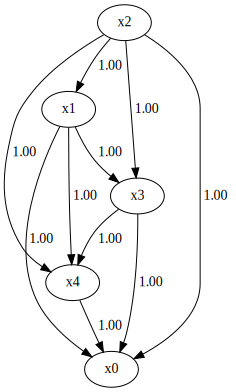

In [12]:
make_dot(true_causal_matrix)

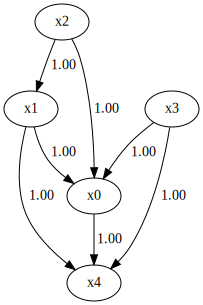

In [13]:
make_dot(adj_matrix)